<a href="https://colab.research.google.com/github/SandeshAdhikari293/Object-Classification-using-ML-techniques/blob/main/CourseworkF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using HOG with SVM to classify images

Start by importing the required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import cv2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler


Load the data & initalise the class names
The class names are taken from the website, and map the label values (0 - 9) to a corresponding string value.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 8s 0us/step


Create an array containing the hog features of each image for both training and testing data. This is done in an attempt to speed up computation, it may however have an adverse affect on accuracy.

In [ ]:
x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

Display a comparison between the shape of the two datasets, one before grayscale and the other after.

In [ ]:
print(train_images.shape)
print(x_train.shape)

(50000, 32, 32, 3)
(50000, 32, 32)


Extract the HOG features from every image in the training dataset and store in a new array. Pixels per cell are set to (8, 8) as any lower results in excessive computation time.

In [ ]:
train_hog = []

for i in range(len(x_train)): # Iterate every training image
  fd = skimage.feature.hog(x_train[i],  pixels_per_cell = (8,8),
                     cells_per_block = (3,3) , visualize = False)
  train_hog.append(fd)

train_hog = np.array(train_hog)


Extract the HOG features from every image in the testing dataset and store in a new array.

In [ ]:
test_hog = []

for i in range(len(x_test)): # Interate every test image
  fd = skimage.feature.hog(x_test[i],  pixels_per_cell = (8,8),
                     cells_per_block = (3,3) , visualize = False)
  test_hog.append(fd)

test_hog = np.array(test_hog)

Display the new shape of the hog feature array

In [ ]:
print(train_hog.shape)

(50000, 324)


Create a standard scaler and transform the HOG features. This standardises the data by removing the mean and scaling to unit variance, improving the performance of the model.


In [ ]:
scaler = StandardScaler()
scaler.fit(train_hog)
train_data = scaler.transform(train_hog) # Scale the training and test data
test_data = scaler.transform(test_hog)


Create an SVM model using rbf and fit the training data to it, this is the most computationally expensive part of this solution.

In [ ]:
svc = SVC(kernel='rbf', C=1)
svcfit =  svc.fit(train_data, train_labels.flatten()) # Fit the training data to the model

Create an array containing the predicted labels from the test data. This can be used to calculate the accuracy of the of model by comparing it to the true labels for the test data.

In [ ]:
predict = svcfit.predict(test_data)

Calculate the accuracy on test data.

In [ ]:
accuracy = accuracy_score(predict, test_labels.flatten()) #Calculate accuracy
print(accuracy)

0.6353


The model finished with an accuracy of 63.5%

Create a confusion matrix with a heatmap

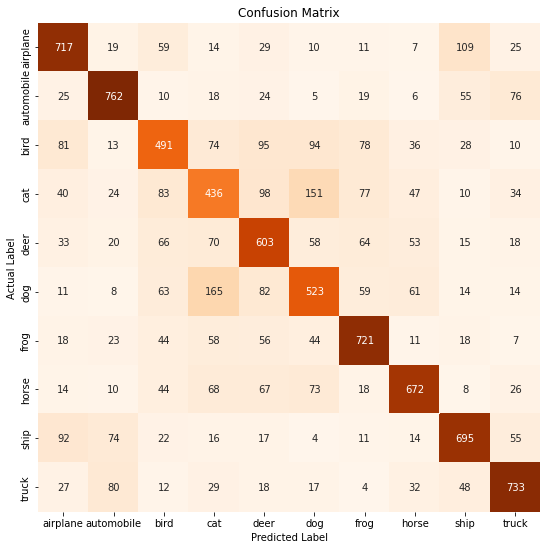

In [ ]:
cm = confusion_matrix(test_labels.flatten(), predict) #Create confusion matrix

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.Oranges) # Define heatmap
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Second method: Convolutional Neural Network

Download the cifar10 dataset (Re-downloading data to ensure no pre-processing is carried over from the previous model)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Convert the images to grayscale


In [ ]:
x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

Verify the shape of the dataset, seeing that a dimension has been reduced.

In [ ]:
print(x_test.shape)

(10000, 32, 32)


Normalise the dataset

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Create the convolutional neural network
Takes a grayscale image as input, therefore the shape is (32, 32, 1)
Follows the standard Convolutional Layer (to extract features) followed by Pooling Layer (to extract most promininet features and reduce dimensionality)
The output layer contains 10 nodes, representing each of the possible classes. It uses the softmax activation function to output a percentage of the likelihood for each class the input could belong to. The highest percentage will be taken as the predicted label.
The other layers use the ReLU activation function due to its faster convergence when compared to sigmoid.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Display a summary of the architecture of the CNN

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

Train the CNN model using 20 epochs, using accuracy as a metric, and sparse categorical crossentropy to calculate loss.
The adam optimiser will also be used, due to its adaptive learning rate, individually adjusting parameters.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(x_train, train_labels, epochs=20,
                    validation_data=(x_test, test_labels))

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6573 - accuracy: 0.4024 - val_loss: 1.4726 - val_accuracy: 0.4839
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3515 - accuracy: 0.5238 - val_loss: 1.2862 - val_accuracy: 0.5447
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2071 - accuracy: 0.5768 - val_loss: 1.1977 - val_accuracy: 0.5818
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1138 - accuracy: 0.6110 - val_loss: 1.1700 - val_accuracy: 0.5914
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0455 - accuracy: 0.6348 - val_loss: 1.0806 - val_accuracy: 0.6270
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9850 - accuracy: 0.6553 - val_loss: 1.0392 - val_accuracy: 0.6414
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9374 - accuracy: 0.6734 - val_loss: 1.0127 - val_accuracy:

Display a graph of the accuracy against epoch

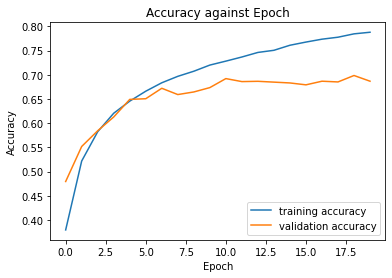

In [ ]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy against Epoch")
plt.legend(loc='lower right')
plt.show()

Plot the loss against epoch

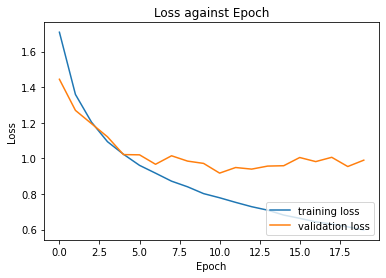

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss against Epoch")
plt.legend(loc='lower right')
plt.show()

Calculate the loss and accuracy of the model using the test data set

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.9899 - accuracy: 0.6868


The model recieved an accuracy of 68.7% after running for 20 epochs.

Use the model to predict labels for the test data. Since the predictions provide an array of all classes and their corresponding percentages (Since we are using softmax activation for the final layer) we must find the label with the highest value.

The confusion matrix is then produced, and a heat map applied to it to enhance its visuals appearance.



313/313 [==============================] - 2s 5ms/step


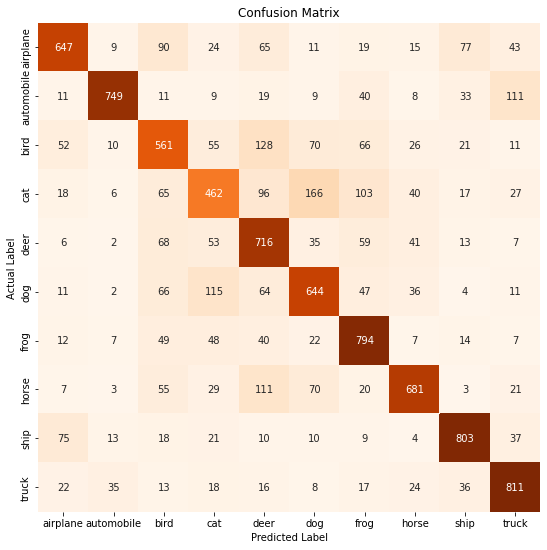

In [ ]:
predictions = model.predict(x_test)
y_pred = predictions.argmax(axis=1)

cm = confusion_matrix(test_labels, y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=class_names, yticklabels=class_names, fmt='d', annot=True, cmap=plt.cm.Oranges)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

As a visual representation of the final layer and output of the cnn, we can view the softmax predictions for each class based on index.

In [ ]:
index = 32 # Change to any value between 0-10000 to view the CNN's prediction
sum = 0 # Check sum
for x in range(10): # 10 nodes of output, representing the 10 classes
  print(class_names[x]," | ",predictions[index][x])
  sum = sum + predictions[index][x]
print("Predicted label:",class_names[y_pred[index]])
print("Actual label:",class_names[test_labels[index][0]])
print("%:",sum)

airplane  |  0.0031455369
automobile  |  4.4390535e-07
bird  |  0.0053078863
cat  |  0.015079158
deer  |  0.97159183
dog  |  0.0016009843
frog  |  0.0003069726
horse  |  0.00026310698
ship  |  0.0026959975
truck  |  8.159893e-06
Predicted label: deer
Actual label: deer
%: 1.0000000768705775
